In [300]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import linregress

In [301]:
path = "C:/Users/dardo/Desktop/Curso_estadistica/Trabajo_Final/Trabajo_Final_Dallachiesa/Tabla_Plantas.csv"
legumes = pd.read_csv(path,sep=';')
legumes

,Planta,Población,Altura (cm),Temperatura (°C),Humedad (%),Crecimiento
0,Glycine max,100,30.5,25,60,Óptimo
1,Phaseolus vulgaris,80,25.2,28,55,Deficiente
2,Medicago truncatula,120,32.1,23,58,Óptimo
3,Glycine max,95,28.9,27,62,Óptimo
4,Phaseolus vulgaris,85,26.5,26,59,Deficiente
5,Medicago truncatula,110,31.3,24,61,Óptimo
6,Glycine max,105,29.8,25,63,Óptimo
7,Phaseolus vulgaris,75,24.7,29,56,Deficiente
8,Medicago truncatula,115,30.9,22,57,Óptimo
9,Glycine max,90,27.6,26,64,Óptimo


In [302]:
# agregar categorización: por encima de determinadas alturas son altas, y debajo bajas (punto de corte)
# encontrar yo lo anterior con un histograma, 
# test de chi cuadrado para encontrar el punto de corte entre dos poblaciones
# hacer el trabajo poner un valor de corte y hacer el test (se sabe que crecen hasta determinada altura 
# y poner eso como punto de corte para diferentes test)
# se ha establecido que las plantas con una altura igual o superior a 28 cm se consideran de crecimiento óptimo, 
# mientras que las plantas con una altura inferior a 28 cm se consideran de crecimiento deficientes.

In [303]:
# La hipótesis planteada es:
# Hipótesis: La humedad tiene una correlación positiva con la altura de las leguminosas.
# Para probar esta hipótesis, se busca establecer si existe una relación significativa entre la variable de humedad 
# y la variable de altura en las leguminosas. 
# La hipótesis asume que a medida que aumenta el nivel de humedad, también aumentará la altura de las leguminosas.
# Los pasos para llevar a cabo esta prueba son los siguientes:

# Establecer las hipótesis nula (H0) y alternativa (H1):
# H0: No hay correlación entre la humedad y la altura de las leguminosas.
# H1: Existe una correlación positiva entre la humedad y la altura de las leguminosas.

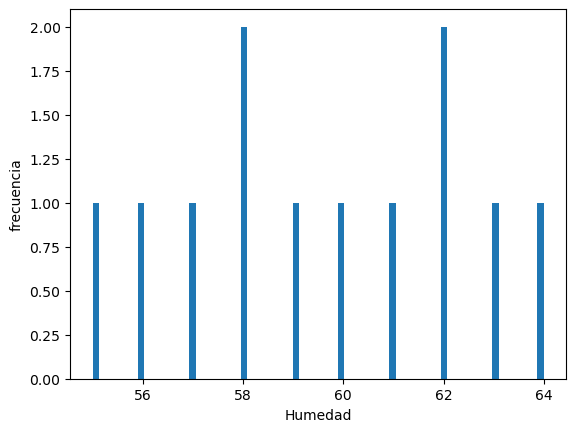

In [304]:
x = legumes['Humedad (%)']
plt.hist(x, bins=70)
plt.ylabel('frecuencia');
plt.xlabel('Humedad');

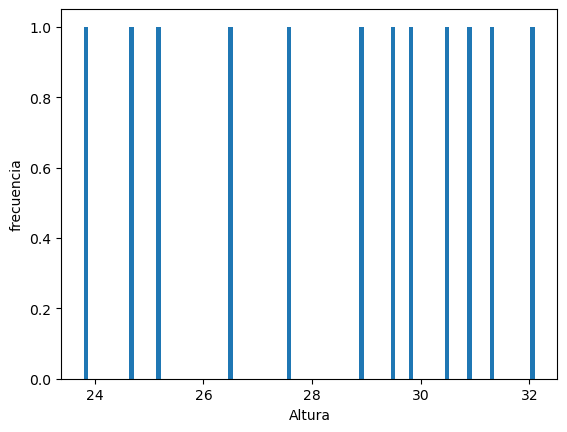

In [305]:
x = legumes['Altura (cm)']
plt.hist(x, bins=100)
plt.ylabel('frecuencia');
plt.xlabel('Altura');

In [306]:
effect_size = abs((legumes['Altura (cm)'].max()-legumes['Altura (cm)'].min())/legumes['Altura (cm)'].std())   
# diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n))

El tamaño muestral necesario es: 3


c:\Users\dardo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\dardo\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [307]:
effect_size = abs((legumes['Humedad (%)'].max()-legumes['Humedad (%)'].min())/legumes['Humedad (%)'].std())   
# diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n))

El tamaño muestral necesario es: 3


In [308]:
# Calcular la media y la desviación estándar de altura
datos1= np.mean(legumes['Altura (cm)'])
datos_std1 = np.std(legumes['Altura (cm)'], ddof=1)
print (datos1)
print (datos_std1)

28.400000000000002
2.7882871901124995


In [309]:
# Calcular la media y la desviación estándar de humedad
datos2= np.mean(legumes['Humedad (%)'])
datos_std2 = np.std(legumes['Humedad (%)'], ddof=1)
print (datos2)
print (datos_std2)

59.583333333333336
2.874917653629668


In [310]:
print(ss.normaltest(legumes['Altura (cm)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(legumes['Altura (cm)']))

NormaltestResult(statistic=1.8910785976421935, pvalue=0.38847001297963046)
ShapiroResult(statistic=0.9330066442489624, pvalue=0.41307348012924194)


c:\Users\dardo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [311]:
print(ss.normaltest(legumes['Humedad (%)'], axis=0, nan_policy='propagate'))
print(ss.shapiro(legumes['Humedad (%)']))

NormaltestResult(statistic=1.1365060230180863, pvalue=0.5665142686180424)
ShapiroResult(statistic=0.9658291339874268, pvalue=0.8626019954681396)


In [312]:
ss.ttest_ind(legumes['Altura (cm)'], legumes['Humedad (%)'], axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
ss.ttest_ind_from_stats(datos1, datos_std1, n1, datos2, datos_std2, n2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-13.53353895715043, pvalue=0.00016243814853461255)

In [313]:
#El valor de la estadística de prueba es -13.53353895715043. 
#Esta estadística cuantifica la diferencia entre las medias de las dos muestras y se utiliza para evaluar la significancia del resultado.

#Valor p (p-value): El valor p obtenido es 0.00016243814853461255. 
#determinar si se puede rechazar o no la hipótesis nula.

#valor p es menor que un umbral de significancia comúnmente utilizado, 
#se puede concluir que hay evidencia estadística para rechazar la hipótesis nula. 
#Esto indica que hay una diferencia significativa entre las medias de las dos muestras. 
#En este caso, la diferencia es negativa y el valor absoluto de la estadística de prueba es grande, 
#lo que indica que la media de la primera muestra es significativamente menor que la media de la segunda muestra.

#En resumen, el resultado sugiere que hay una diferencia estadísticamente significativa entre las medias de las dos muestras 
#y que la media de la primera muestra es significativamente menor que la media de la segunda muestra.

In [314]:
#tabla de contingencia (encontrar relación entre variables)

df1 = pd.crosstab(legumes['Altura (cm)'] >= 28.0, legumes['Crecimiento'] == 'Óptimo')
print(df1)

#comparamos los datos en una tabla de contingencia
groups = df1.groupby([a,b]).count() 
print (groups)

Crecimiento  False  True 
Altura (cm)              
False            4      1
True             0      7
Empty DataFrame
Columns: [False, True]
Index: []


In [315]:
#Test de comparación de datos cualitativos (necesita una tabla de contingencia)
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(legumes['Altura (cm)'] >= 28.0, legumes['Crecimiento'] == 'Óptimo')

# Realizar el test de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados
print("chi cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Valores esperados:", expected)

chi cuadrado: 5.185714285714285
Valor p: 0.022773309501244822
Grados de libertad: 1
Valores esperados: [[1.66666667 3.33333333]
 [2.33333333 4.66666667]]


In [316]:
# Obtener los datos de altura y humedad
altura = legumes['Altura (cm)']
humedad = legumes['Humedad (%)']

# Calcular la recta de regresión
slope, intercept, r_value, p_value, std_err = linregress(altura, humedad)

print("(r):", r_value)
print("P value:", p_value)
print("Coeficiente de regresión (pendiente):", slope)
print("Error estándar:", std_err)

(r): 0.38672191231018677
P value: 0.21429805054468382
Coeficiente de regresión (pendiente): 0.3987371375116933
Error estándar: 0.3006846923850679
